# Machine Learning via Linear Regression
Based on what we have learnt in the module, when performing numeric prediction, we should use a form of regression.
Initially, we used linear regression to predict the prices of food because our data is numeric in nature and because it was taught.

However, because the values are from a time series dataset, we realise that linear regression by itself would be an inaccurate model. The values in times series data are correlated with themselves and as such, a different model would be a better predictor.

The following are our observations and insights that we have obtained from performing linear regression on our data. 


#### Importing of libraries and dataset:

In [8]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr

In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

In [89]:
stockCSV = pd.read_csv('stockdata.csv')
stockCSV.head()
stockCSV.describe()

,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F
count,2518.000000,2516.000000,2515.000000,2516.000000,2516.000000,2518.000000,2518.000000,2516.000000,2504.000000
mean,284470.100874,65.779674,1437.539284,585.928855,3.417114,30.372712,73.102271,119.205004,1283.030351
std,91952.506529,22.603293,256.246348,177.044970,1.397860,18.578668,101.969056,4.223685,223.317567
min,139610.000000,-37.630001,1050.800049,362.000000,1.482000,8.292936,2.194000,105.664062,912.500000
25%,211077.500000,48.520000,1243.450012,452.000000,2.621000,17.248809,14.544000,117.421875,1103.000000
50%,275882.500000,59.684999,1317.400024,518.250000,2.957000,24.536765,18.954333,119.613281,1239.750000
75%,327821.500000,85.840002,1704.900024,701.750000,3.889250,38.555936,79.093498,121.570312,1485.000000
max,539180.000000,123.699997,2051.500000,1367.750000,9.680000,99.506813,409.970001,126.210938,2206.500000


### Cleaning of dataframe:

In [11]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values
print("Data type : ", type(stockCSV)) # Checking that NULL values were indeed
print("Data dims : ", stockCSV.shape) # removed

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2503, 10)


### Allocating of variables:

In [12]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [13]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum
0,2013-01-02,139610.0,93.12,1687.9,811.00,3.233,33.891,2.357,124.188,1475.5,2286.50
1,2013-01-03,140549.0,92.92,1673.7,811.25,3.198,33.654,2.318,123.945,1478.0,2289.25
2,2013-01-04,140803.0,93.09,1648.1,804.50,3.287,33.625,2.293,123.891,1503.0,2307.50
3,2013-01-07,140190.0,93.19,1645.5,807.50,3.266,33.381,2.289,123.906,1497.5,2305.00
4,2013-01-08,141000.0,93.15,1661.5,808.75,3.218,33.410,2.245,124.031,1496.0,2304.75


In [14]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

### Our code for linear regression

In [86]:
def univariateLinearRegression(Predictor, Response):
    '''
        Function to perform Linear Regression with Predictor and Response variables
        Prints the Model plot
    '''    
    # Extracting Response and Predictors
    y = Response
    X = Predictor

    # Spliting the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the Actual values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Goodness of Fit on Train Data
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Goodness of Fit on Test Data
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

### Univariate linear regression with random train/test splits

The following is the result of using linear regression as a model to predict prices of food using various variables.

The blue dots are our train data points while the green dots are our test data points.

The red dots are our regression line.



##### Using Gold as a predictor to predict Food prices:

Intercept 	: b =  [696.29986623]
Coefficients 	: a =  [[0.81619013]]


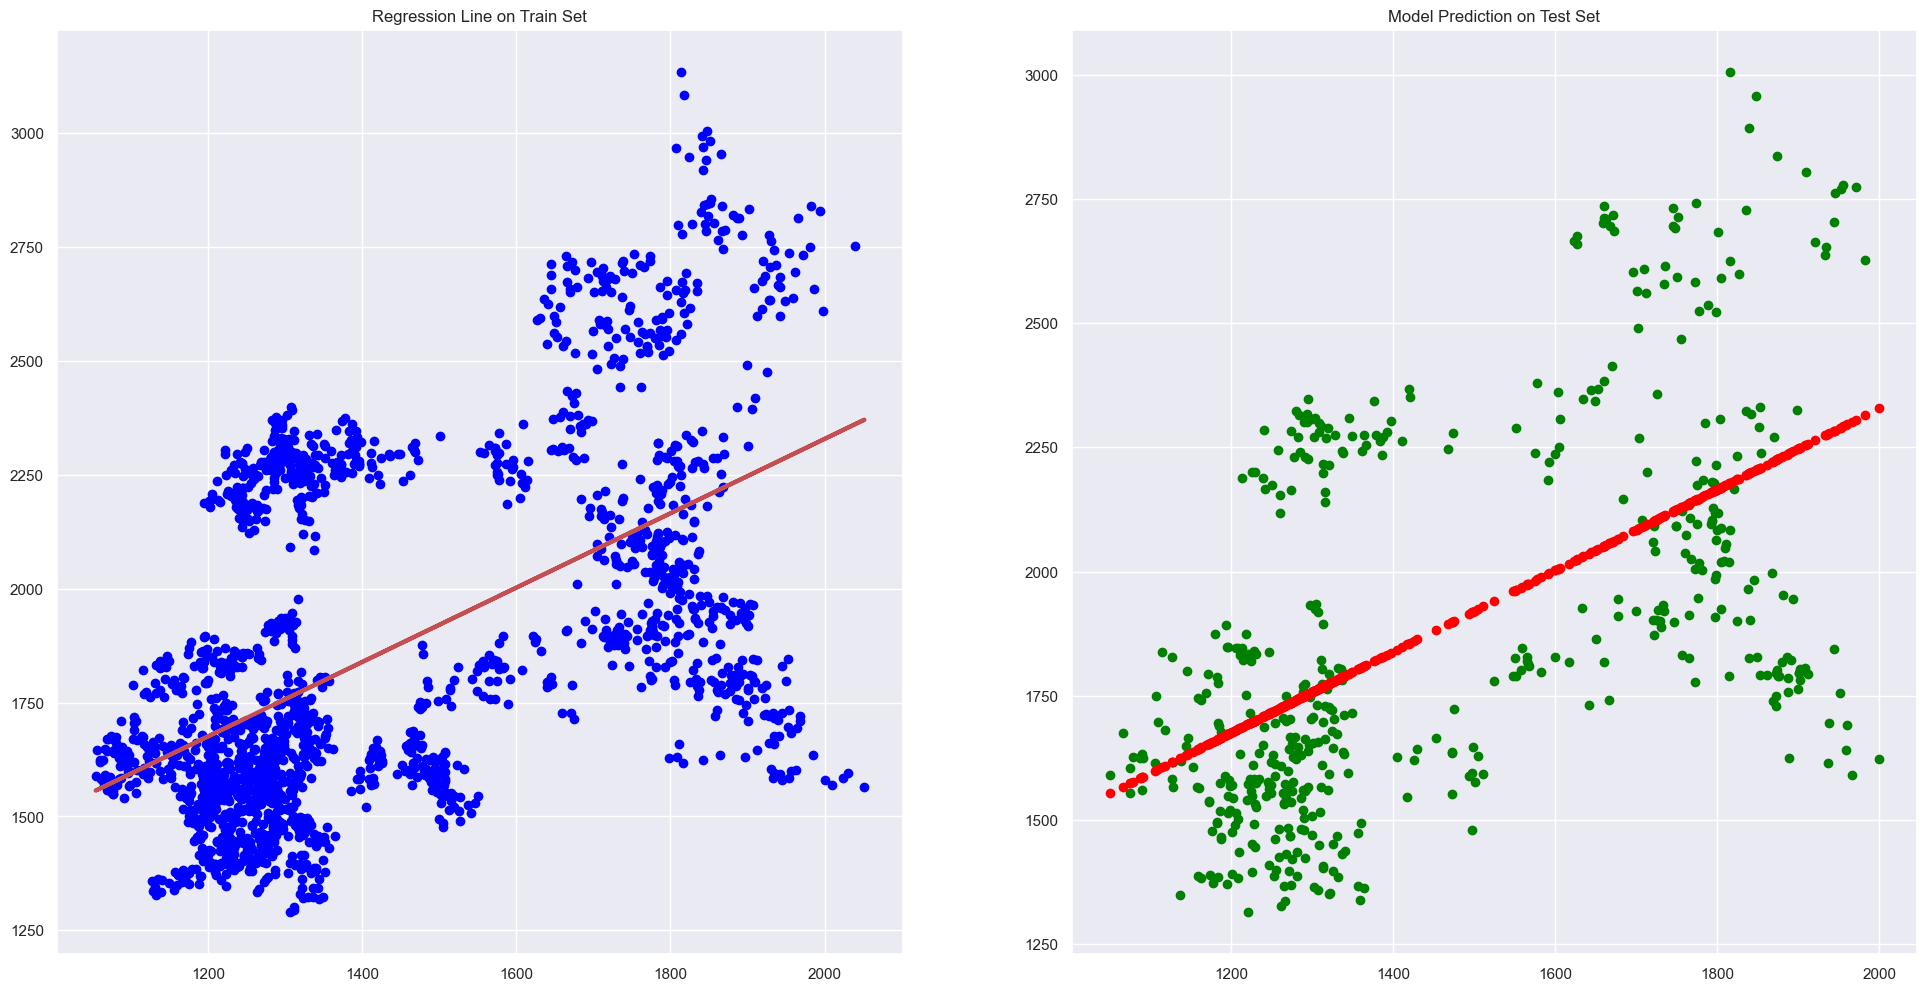

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.30462570287027646
Mean Squared Error (MSE) 	: 98729.35766029678

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 98281.68945673596



In [34]:
univariateLinearRegression(Gold,Food)

The model made using Gold has a moderate explained variance at 0.30 compared to other variables. This suggests that the model only explain some of the variation in Food prices when using Gold as a predictor.

Mean squared error values for both train and test data sets are elevated compared to other predictors. This suggests moderate goodness of fit.

Mean squared error values are close between train and test data sets. (Test data set lower by 0.4%). This suggests that the linear regression model has good predictive accuracy as the error values between test and train data set are not that different.

This tells us that Gold as an estimate of inflation has a moderate influence on Food prices.

##### Using US 5 Year Treasurey Bonds as a predictor to predict Food prices:

Intercept 	: b =  [3135.4949669]
Coefficients 	: a =  [[-10.65436838]]


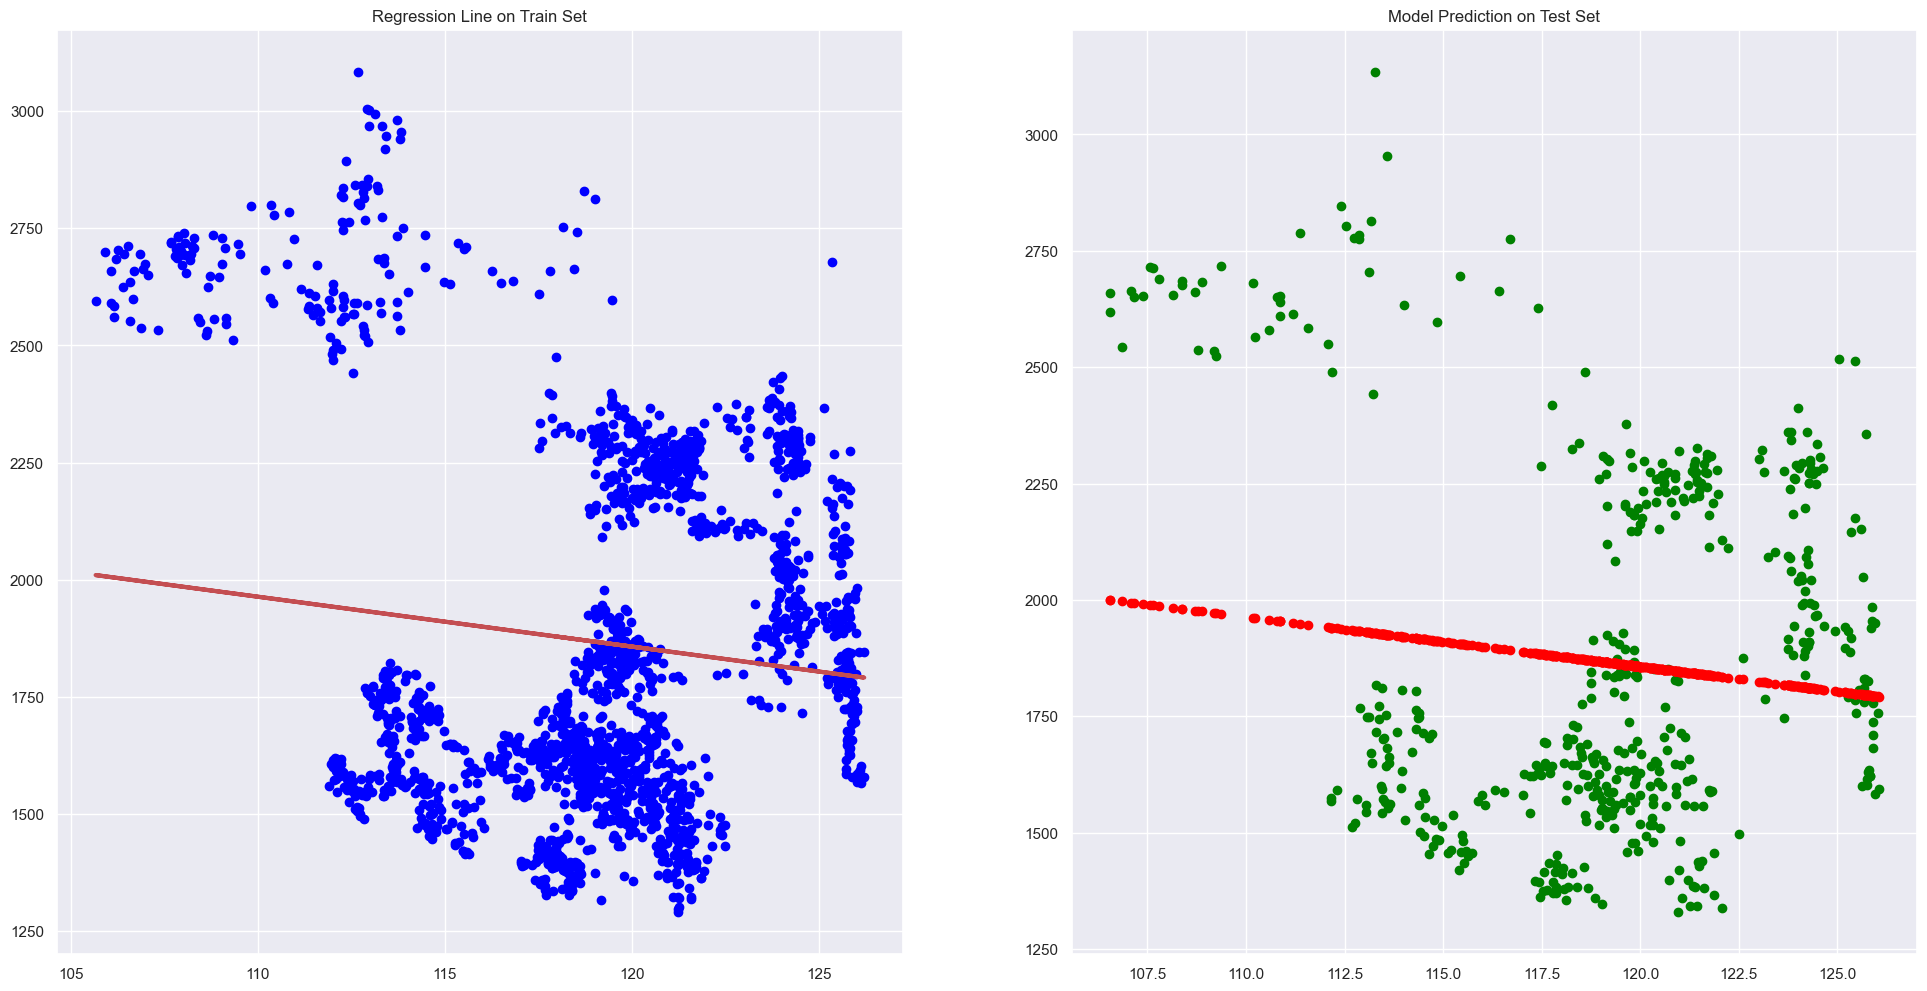

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01428363477462169
Mean Squared Error (MSE) 	: 138286.09169314135

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 146591.48258935293



In [35]:
univariateLinearRegression(Bonds,Food)

US treasury bonds seem to be a poor predictor due to low explained variance at 0.01 in this model. This suggests that the model has low goodness of fit and that it does not explain the variation in Food prices.

Its mean squared error on both train and test data set is the highest out of all other models using different variables which is indicative of poor goodness of fit.

The higher test data mean squared error (increase by 6% compared to train data) suggests poor predictive accuracy.

It seems that US treasury bonds is not a good predictor variable when using this linear regression model to predict Food prices.

##### Using Crude oil as a predictor to predict Food prices:

Intercept 	: b =  [1050.11578503]
Coefficients 	: a =  [[12.50889387]]


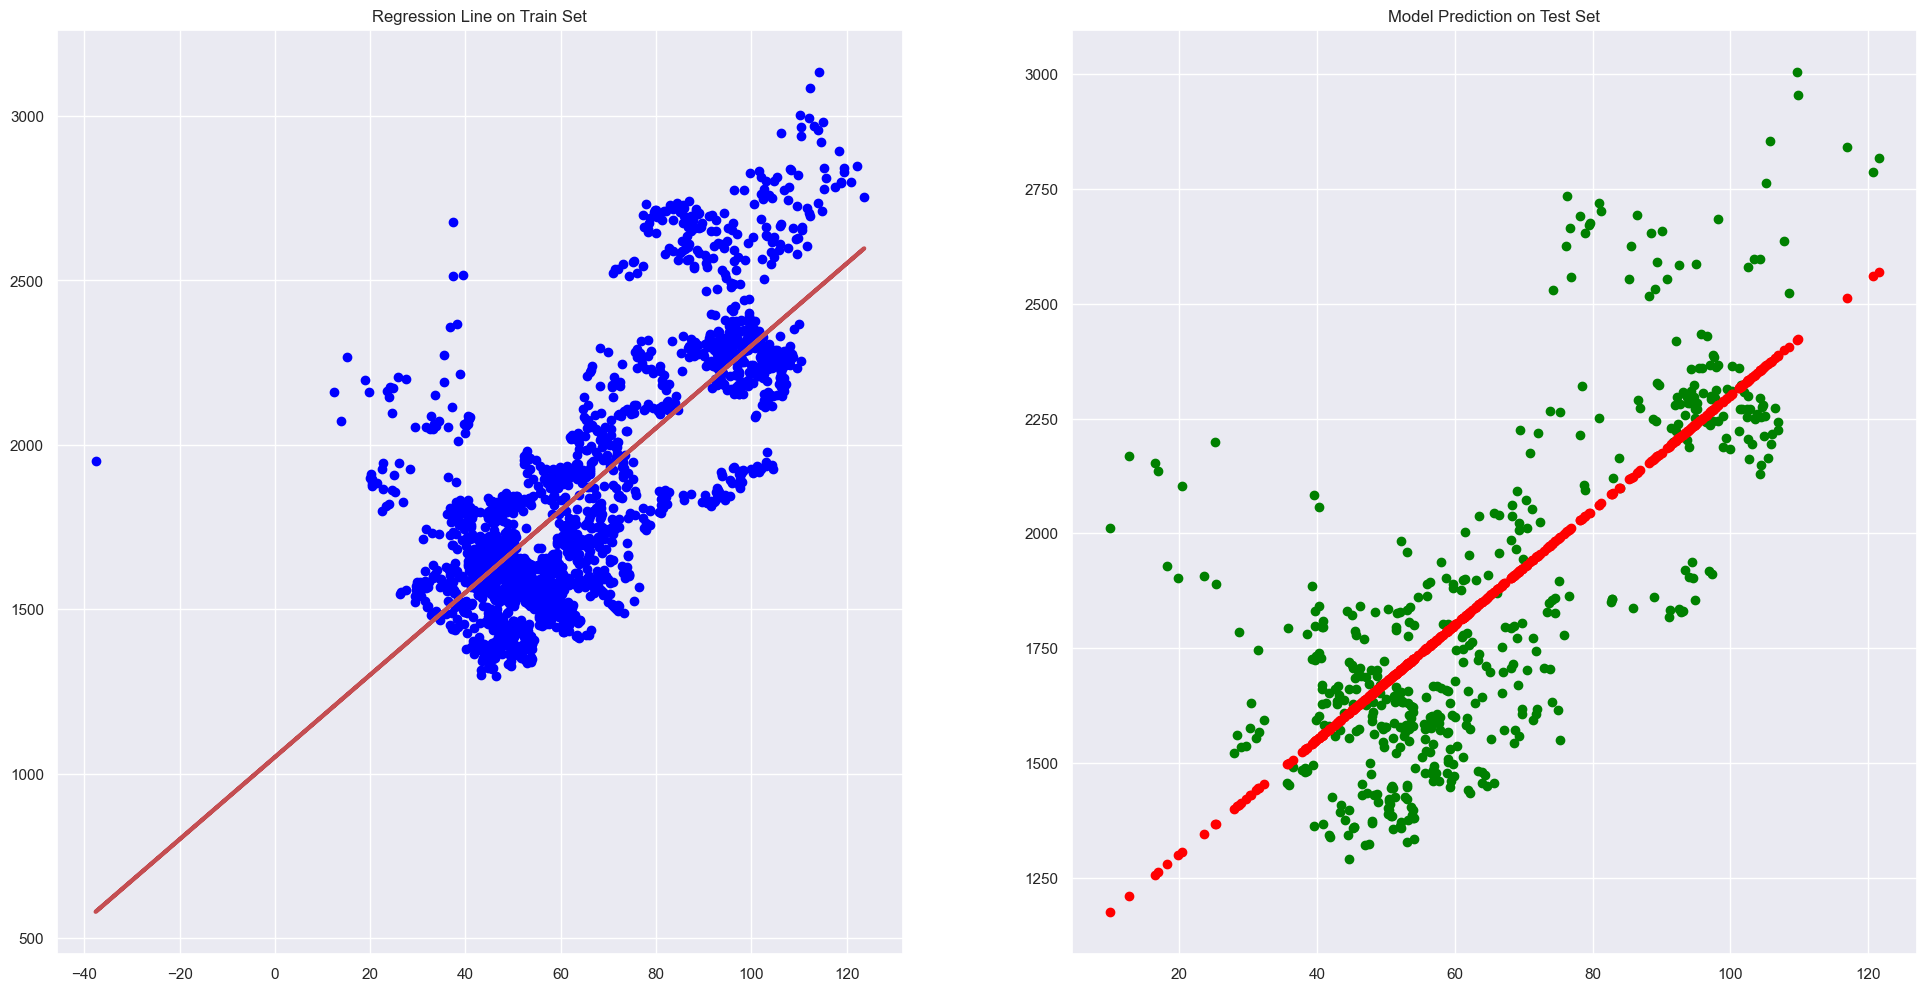

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5655086743165086
Mean Squared Error (MSE) 	: 62313.74694144505

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 61990.36847918527



In [90]:
univariateLinearRegression(Crude,Food)

Crude oil has the highest explained variance at 0.56 out of the rest. This suggests that the model made using this variable has the best goodness of fit.

Its mean squared error is the lowest compared to other linear regression models. This suggest that the linear regression model has the best goodness of fit on both test and train data.

The model's mean squared error on test data and train data differs slightly as test data is 0.5% lower that train data. This suggests that the model has good predictive accuracy on both test and train data.

This indicates that Crude Oil have a strong influence on Food prices and the model we make is suitable to predict those prices.

##### Using Natural gas as a predictor to predict Food prices:

Intercept 	: b =  [1177.13491422]
Coefficients 	: a =  [[200.83362922]]


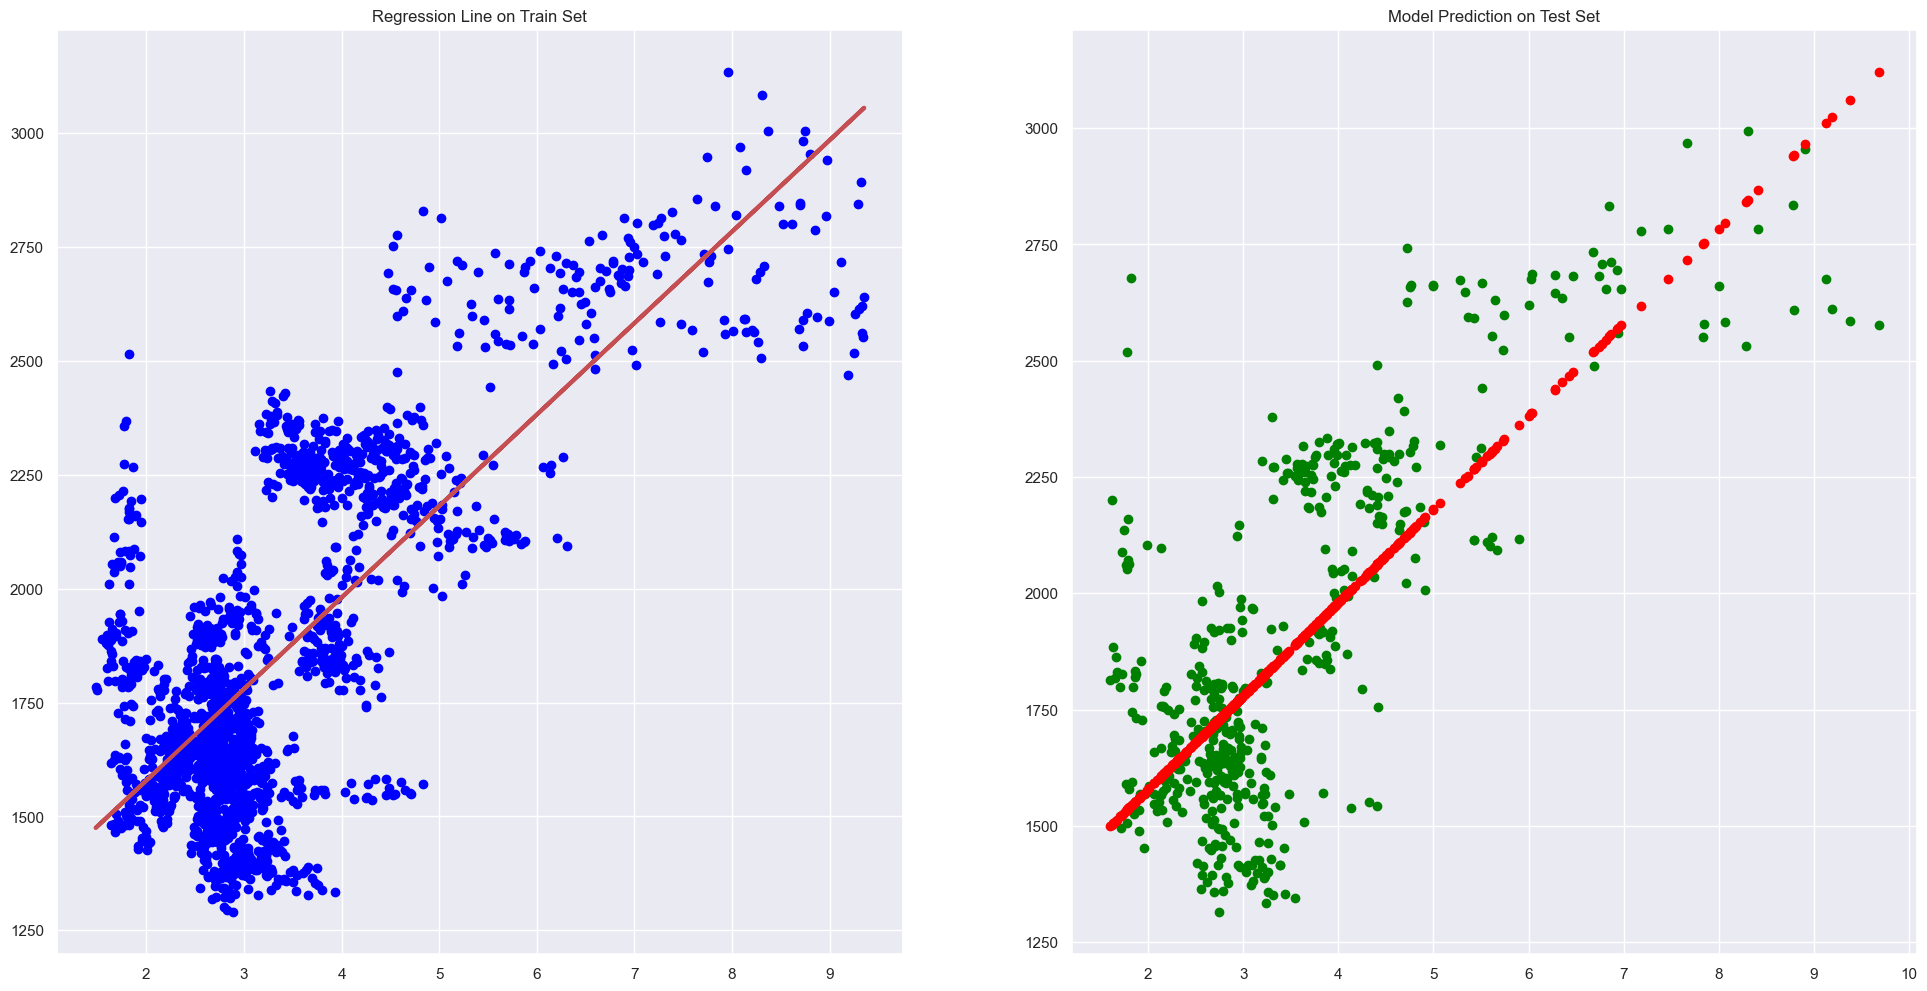

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5546268990331051
Mean Squared Error (MSE) 	: 62642.862200567

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 63917.522999320136



In [91]:
univariateLinearRegression(Nat,Food)

Natural gas has high explained variance at 0.54. This indicates the model made using train dataset has high goodness of fit.

Its mean squared error is low compared to other linear regression models. This suggest that the linear regression model has high goodness of fit on both test and train data.

The model's mean squared error on train data is lower than on test data by 2% which suggests that the model has reduced predictive accuracy on test data compared to train data. However, the model can still be considered to have high predictive accuracy.

This indicates that natural gas has a strong influence on food prices and the model we make can be used to predict those prices. 

##### Using Fertilizer as a predictor to predict Food prices:

Intercept 	: b =  [1496.77324003]
Coefficients 	: a =  [[12.30276334]]


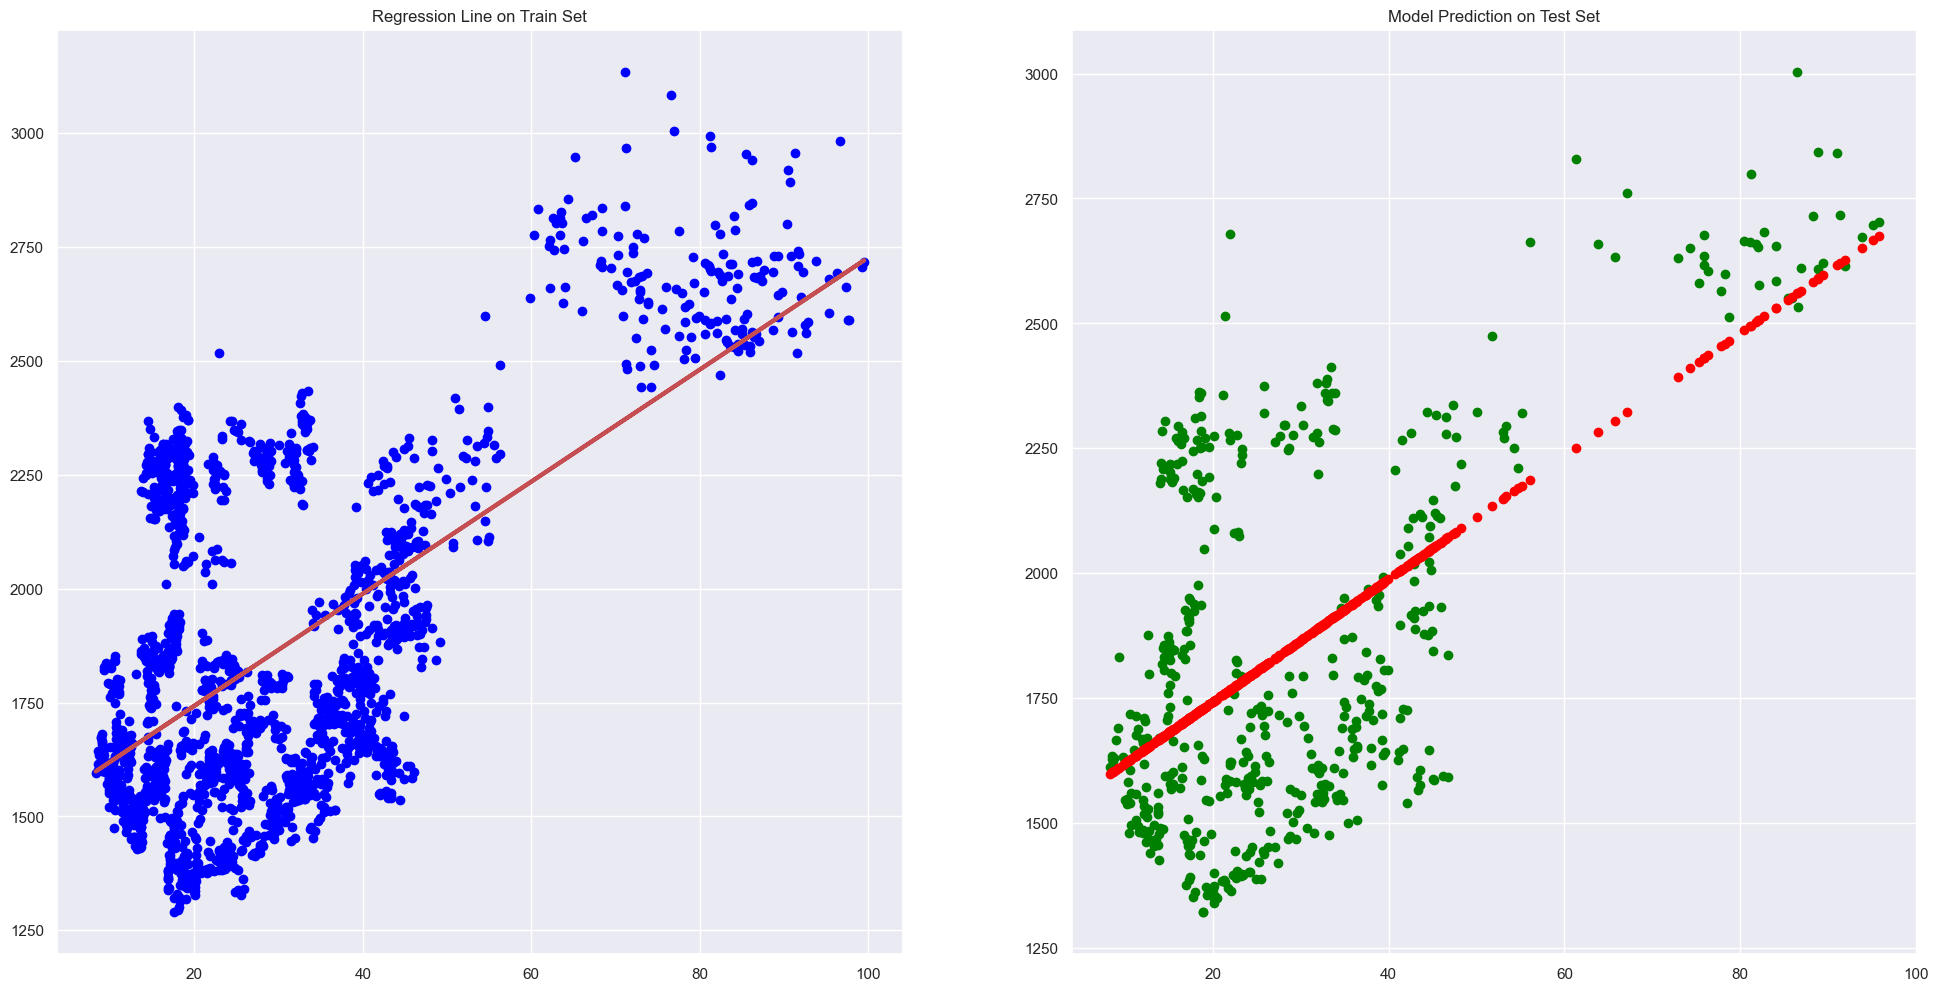

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3708897059814854
Mean Squared Error (MSE) 	: 89324.42989379224

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 89996.66294743115



In [38]:
univariateLinearRegression(Fert,Food)

Fertilizer has an explained variance at 0.37. This is higher than gold but lower than crude oil and natural gas.

Its mean squared error is elevated compared to other linear regression models. This suggest that the linear regression model's goodness of fit on both test and train data is moderately good.

The model's mean squared error values on test data is higher than train data by 0.07%. Because there is not much difference in mean squared error values, it can be said that the model's predictive accuracy is good.

This tells us that fertilizer price have a moderate influence on food prices.

##### Using Berkshire stocks as a predictor to predict Food prices:

Intercept 	: b =  [1458.63112329]
Coefficients 	: a =  [[0.00144183]]


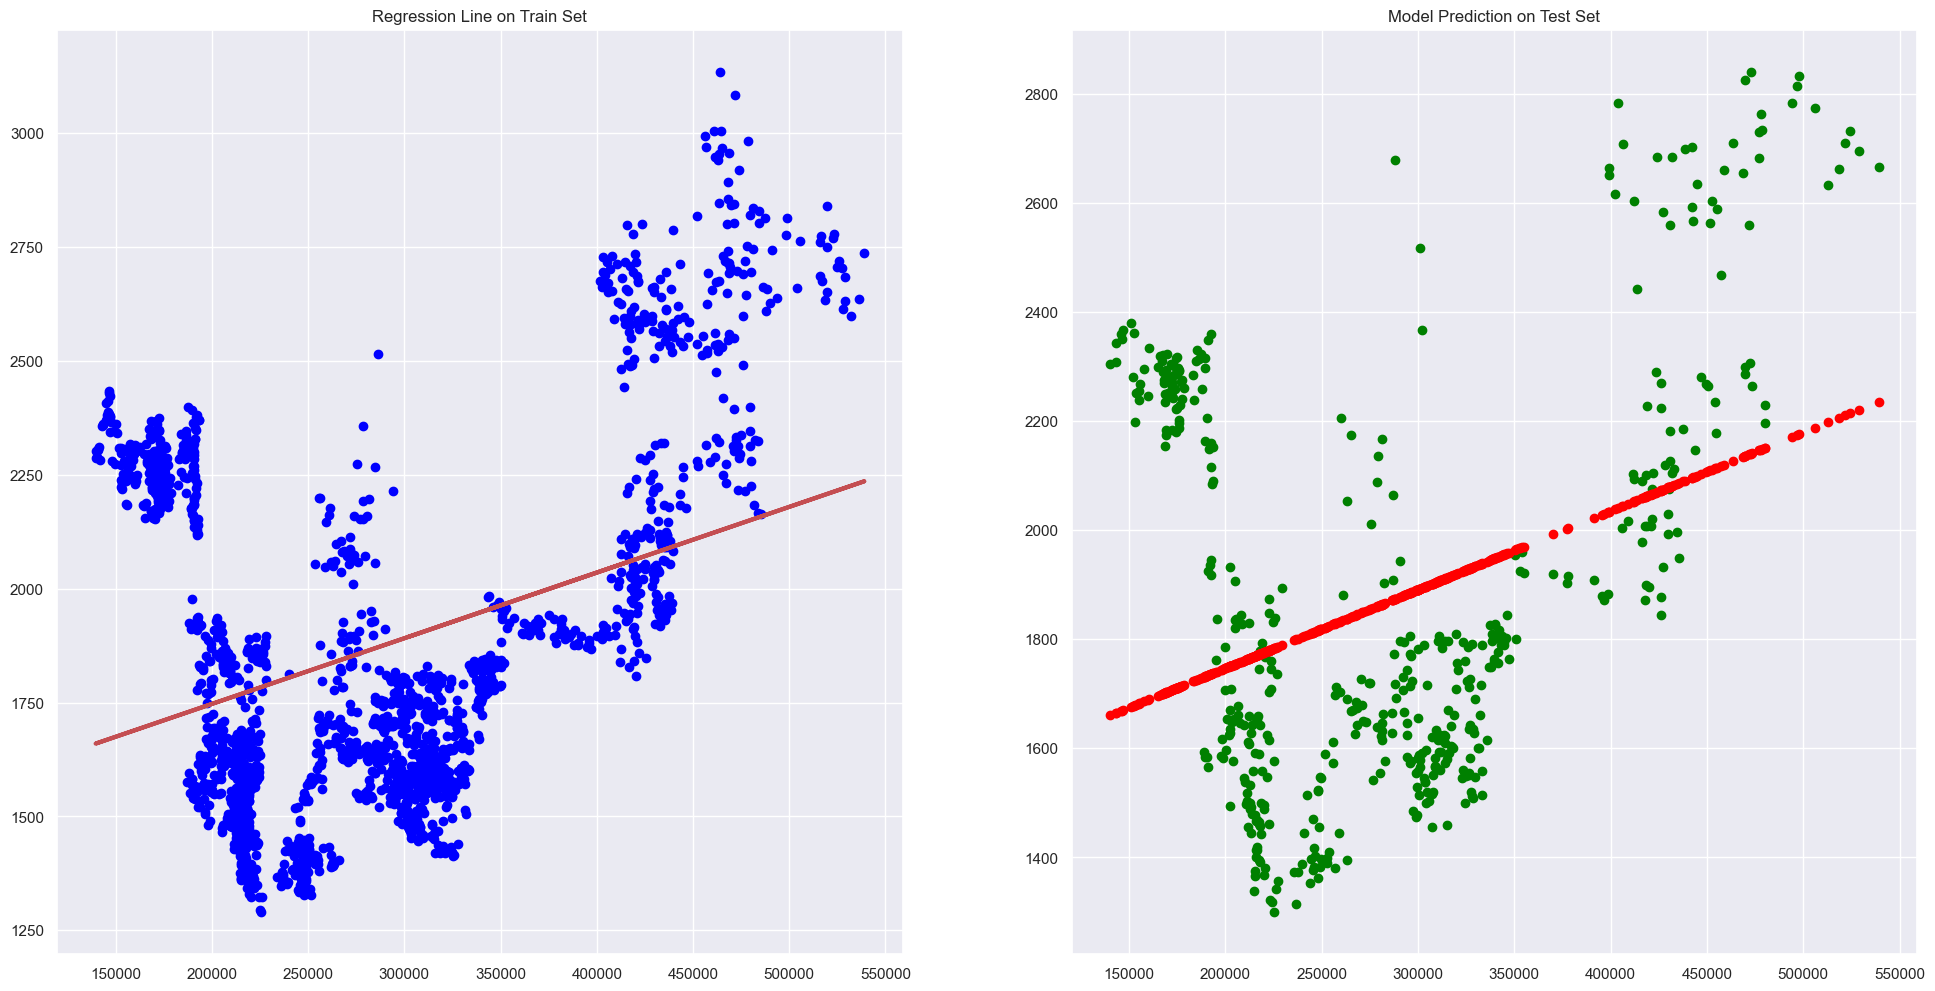

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1233291537341129
Mean Squared Error (MSE) 	: 125163.4618648228

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 125369.51465202734



In [39]:
univariateLinearRegression(Berkshire,Food)

The model made using Berkshire stock has low explained variance at 0.12. This suggests that the model do not explain much of the variance in Food prices when using the stock as a predictor.

Mean squared error values for both train and test data sets are high compared to other predictors and it is only lower compared to Bonds. This suggests bad goodness of fit. 

While its mean squared error values are close with the model's value for train data being 0.2% lower than test data, it only has good predictive accuracy when applied on test dataset and its high mean squared error value indicates the model's poor ability to fit to the data points.

Our results tells us that Berkshire stocks and Food prices likely have little relationship with each other.
Its elevated explained variance value may be justified by how Berkshire Hathaway as a company invests in food companies such as Kraft Heinz[1].

[1] https://www.berkshirehathaway.com/subs/sublinks.html

##### Using Tesla stocks as a predictor to predict Food prices:

Intercept 	: b =  [1721.48898896]
Coefficients 	: a =  [[2.00619669]]


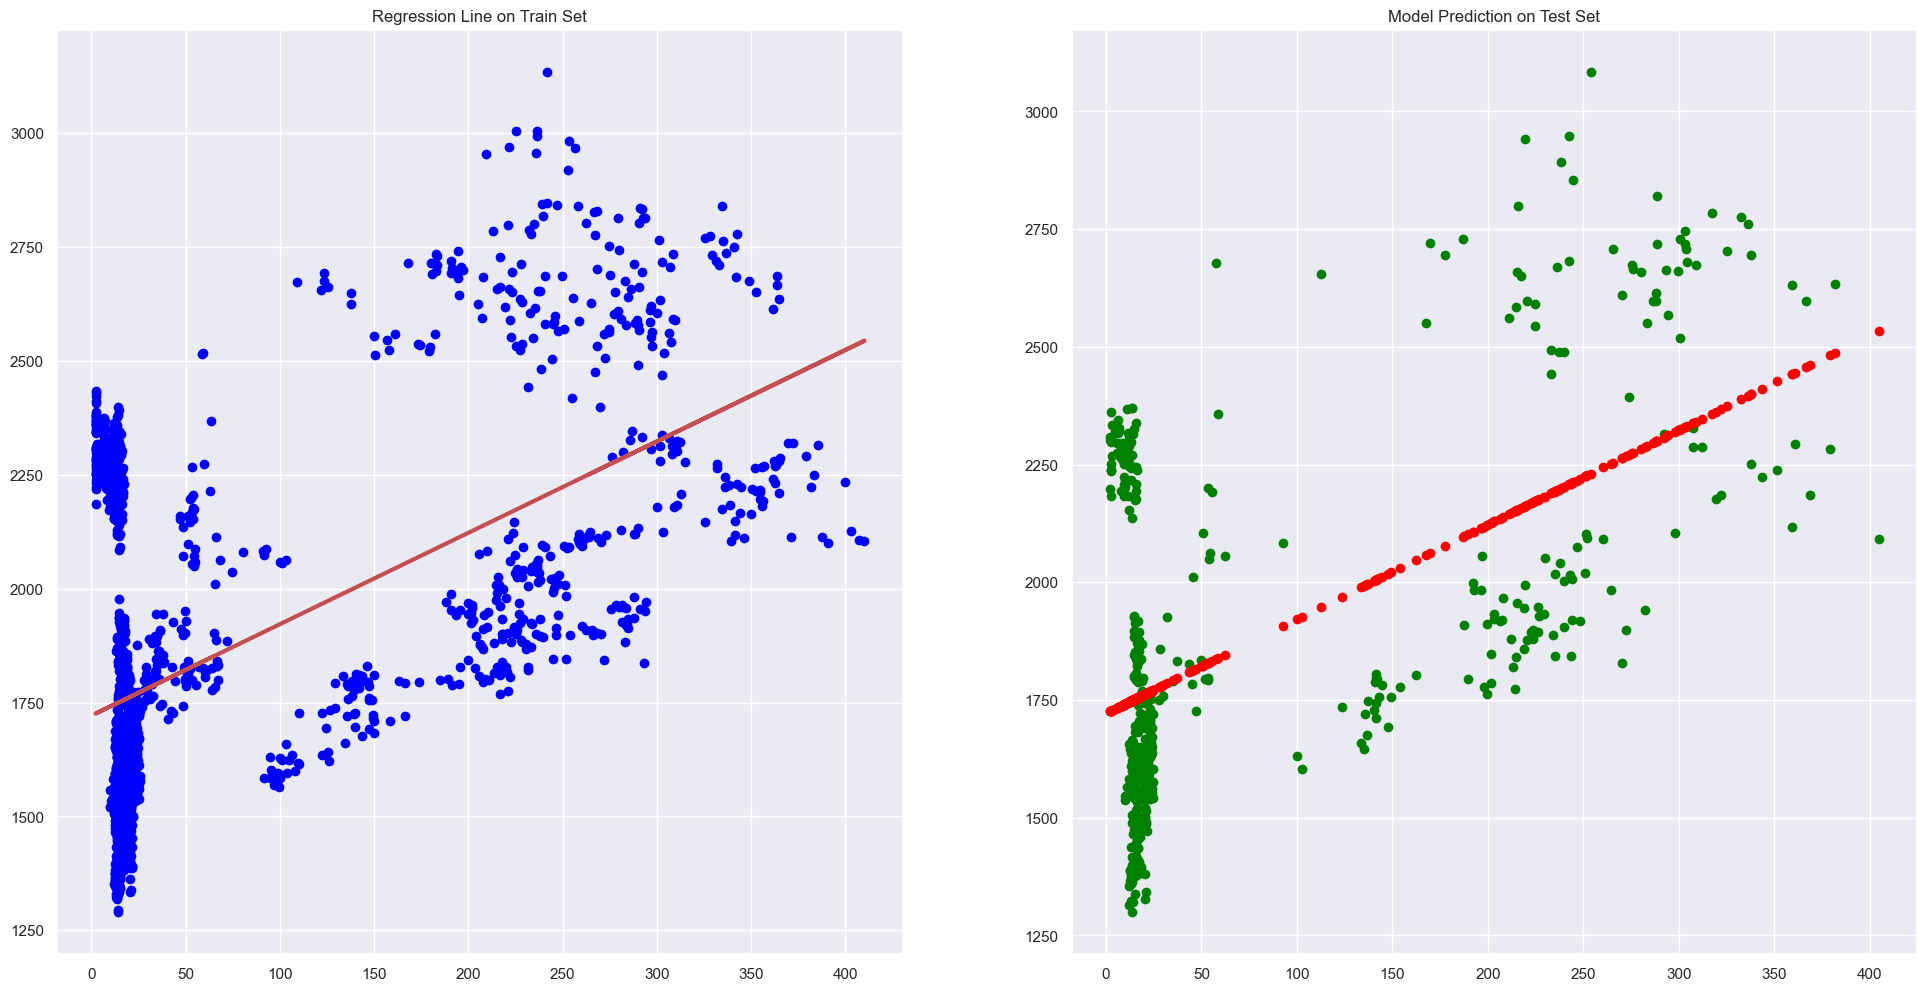

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.29292606297856705
Mean Squared Error (MSE) 	: 98990.76908940087

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 99166.09642874874



In [40]:
univariateLinearRegression(Tesla,Food)

The model made using Tesla stock has moderate explained variance at 0.29 which is lower than gold but higher than Berkshire stocks. This suggests that the model do not explain some of the variation in Food prices when using the stocks as a predictor.

Mean squared error values for train data set are high compared to other predictors. This suggests weak goodness of fit.

Mean squared error values for test data set is higher than train data set by 0.1%. This indicates high predictive accuracy.

The results tells us that Tesla stocks and Food prices likely have a relationship with each other which is strange because we used Tesla stocks as a negative example as we assumed Tesla has little relationship with food prices. We are also unable to find a relationship between the Tesla company and farming.


## Discussion of overall results

According to linear regression, the model using Crude oil and Natural gas as predictors would be the best models to use due to having the lowest mean squared error on train data which implies having a good fit. Their lower mean squared error when used on test data compared to train data implies high prediction accuracy.

They also have high explained variance which further supports that the model fits the data provided. This high explained variance being proportional to their correlation coefficient, also signifies that the two variables are highly correlated with Food prices.

This corresponds with our preconceived notions that the prices of Crude oil and Natural gas would have high influence with regards to the price of food due to their use in the production of energy for food manufacturing and transportation.

The model made using Fertilizer and Gold also have moderately high explained variance and mean squared error. This indicates that while the price of Fertilizer and rates of inflation may have some impact on the food prices, they may not have that much of an impact compared to the prices of crude oil and natural gas. 

Surprisingly, the model made using Tesla stocks also have explained variance and mean squared error that are close to the ones made using Fertilizer and Gold. Tesla and Berkshire stocks were included in this project to act as negative examples to check whether the models we used were accurate or not.

Because the model made using Tesla stocks have similar explained variance and mean square error to the model made using Fertilizer and Gold respectively, further analysis is required to validate whether there is real, significant correlation with Food Prices or the model we use is inaccurate or prone to errors.

## Insights

Because the results and discussion we obtained from the model that uses Tesla data contradicts what we expect to receive, we decide to examine the properties in our data to see what we may have overlooked.

Time series data may contain the following properties that we never took into account when performing linear regression. Such properties are trends, seasonality and autocorrelation.[2]

Trends are the overall rate of change in a time series data which is what we seek to reveal and compare through analysis.

Seasonality is a property of certain time series data such as our stocks and futures data where there are recurring patterns of change that occurs throughout its the interval of data collection such as seasons affecting food prices and consumer purchasing habits.

Stationarity is the property of time series data where it is not affected by seasonality.[3]

When performing time series analysis, we also need to take into account autocorrelation where the property of a single value can be related to its previous value (also known as lagged value). [2]

[2] https://www.influxdata.com/what-is-time-series-data/#:~:text=Time%20series%20data%20is%20unique,questions%20about%20it%20over%20time.

[3] https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322


## References:
[1] https://www.berkshirehathaway.com/subs/sublinks.html

[2] https://www.influxdata.com/what-is-time-series-data/#:~:text=Time%20series%20data%20is%20unique,questions%20about%20it%20over%20time.

[3] https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322